**<h1> ALGORITMO GENÉTICO**


Aline Freire de Rezende - 116110571<br>
Larissa Monteiro da Fonseca Galeno - 116083017

In [2]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt 

<h2>1 - Modelagem do Indivíduo

<h3>a) Utilize a mesma representação de tabuleiro usada na tarefa do Hill Climbing.

No caso de um tabuleiro 4x4, temos um vetor de 1x4.. Só pode haver uma rainha por coluna, então a coluna em que existir uma, será representada pelo número da linha.<br>
**Por exemplo:**<br>
Um tabuleiro do tipo: <br>
[R &nbsp; 0 &nbsp; 0 &nbsp; 0]<br>
[0 &nbsp; 0 &nbsp; 0 &nbsp; R]<br>
[0 &nbsp; R &nbsp; 0 &nbsp; 0]<br>
[0 &nbsp; 0 &nbsp; R &nbsp; 0]<br>
onde 0 representa onde está vazio, e R representa onde há uma rainha; na modelagem em questão, é representado por: <br>
[0 &nbsp; 2 &nbsp; 3 &nbsp; 1]

<h3>b) Proponha uma representação binária para o tabuleiro.

No caso de um tabuleiro 4x4, temos uma string de tamanho Combinação de 4, tomados 2 a 2. Só pode haver uma rainha por coluna, então a coluna em que existir uma, será representada pelo número em binário da linha.<br>
**Por exemplo:**<br>
Um tabuleiro do tipo: <br>
[R &nbsp; 0 &nbsp; 0 &nbsp; 0]<br>
[0 &nbsp; 0 &nbsp; 0 &nbsp; R]<br>
[0 &nbsp; R &nbsp; 0 &nbsp; 0]<br>
[0 &nbsp; 0 &nbsp; R &nbsp; 0]<br>
onde 0 representa onde está vazio, e R representa onde há uma rainha; na modelagem em questão, é representado por: <br>
**00101101**

<h2>2 - Geração População Inicial

<h3>a) Defina uma função que dado o tamanho n de uma população, gera aleatoriamente um conjunto de n indivíduos. A função deve funcionar para os dois tipos de indivíduos definidos no item anterior.

In [3]:
def geraTabuleiro(n):
  tabuleiro = []

  for x in range(n):
    posicaoRainha = random.randint(0, n-1) 
    tabuleiro.append(posicaoRainha)

  return tabuleiro

geraTabuleiro(4)

[1, 1, 0, 0]

In [4]:
# GERA TABULEIRO SEM NINGUÉM NA MESMA LINHA
def geraTabuleiroSemLinhaRepetida(n):

  modelo = []
  for i in range(n):
    modelo.append(i)
  
  tabuleiro = []

  for x in range(n):
    pos = random.randint(0, len(modelo)-1) 
    tabuleiro.append(modelo[pos])
    modelo.pop(pos)

  return tabuleiro

def geraTabuleiro_Binario(n):
  tabuleiro = ''
  tam_numero = int(math.log(n, 2))
  #print(tam_numero)

  for i in range(n):
    for j in range(tam_numero):
      num = random.randint(0,1)
      tabuleiro = str(num) + tabuleiro #concatena a string
  
  return tabuleiro

geraTabuleiroSemLinhaRepetida(4)

[1, 2, 3, 0]

In [5]:
def geraTabuleiro_Binario(n):
  tabuleiro = ''
  tam_numero = int(math.log(n, 2))
  #print(tam_numero)

  for i in range(n):
    for j in range(tam_numero):
      num = random.randint(0,1)
      tabuleiro = str(num) + tabuleiro #concatena a string
  
  return tabuleiro

geraTabuleiro_Binario(4)

'01101100'

In [6]:
def geraPopulacao(numIndividuos, n):
  populacao = []

  for i in range(numIndividuos):
    populacao.append(geraTabuleiro(n)) ##### FALTA LIDAR COM ELEMENTOS REPETIDOS

  return populacao

geraPopulacao(10, 4)

[[1, 2, 2, 0],
 [0, 0, 2, 3],
 [1, 1, 0, 3],
 [1, 1, 1, 3],
 [2, 0, 0, 1],
 [0, 2, 0, 1],
 [0, 3, 3, 3],
 [2, 3, 1, 3],
 [1, 1, 0, 0],
 [3, 1, 0, 3]]

In [7]:
def geraPopulacao_Binario(numIndividuos, n):
  populacao = []
  for i in range(numIndividuos):
    populacao.append(geraTabuleiro_Binario(n))
  
  return populacao

geraPopulacao_Binario(10, 4)

['11001011',
 '11100100',
 '01010111',
 '10100100',
 '11100000',
 '01001110',
 '01110010',
 '00101100',
 '00110010',
 '01000000']

In [9]:
def transformaBinparaDecimal(populacao, tam_tabuleiro):
  n = len(populacao)
  tam_numero = int(math.log(tam_tabuleiro, 2))
  populacao_decimal = []
  aux = ''
  
  #transoformar populacao de binário para decimal
  for i in range(n): #i representa em qual individuo da populacao eu to
    tabuleiro_decimal = []
    elemento = 0
    for k in range(tam_tabuleiro):
      aux = ''
      for j in range(tam_numero):
        aux = aux + populacao[i][elemento]
        elemento = elemento + 1
      num_decimal = int(aux, 2) #transforma de binário paradecimal
      tabuleiro_decimal.append(num_decimal)
    populacao_decimal.append(tabuleiro_decimal)
  
  return populacao_decimal

populacao = ['11001011','11100100','01010111','10100100','11100000','01001110','01110010','00101100','00110010','01000000']
transformaBinparaDecimal(populacao, 4)

[[3, 0, 2, 3],
 [3, 2, 1, 0],
 [1, 1, 1, 3],
 [2, 2, 1, 0],
 [3, 2, 0, 0],
 [1, 0, 3, 2],
 [1, 3, 0, 2],
 [0, 2, 3, 0],
 [0, 3, 0, 2],
 [1, 0, 0, 0]]

<h2>3 - Operadores: Para os dois tipos de indivíduos definidos acima:

<h3>a) Defina a função de adaptação usada para avaliar um tabuleiro T.

In [10]:
def avaliaAtaques(tabuleiro):
  n = len(tabuleiro)
  ataques = 0

  for i in range(n-1): # caso esteja na mesma coluna
    for j in range(i+1, n):
      if (tabuleiro[i] == tabuleiro[j]):
        ataques = ataques + 1

  for i in range(n-1): # caso esteja na mesma diagonal. Para baixo e para cima, respectivamente
    for j in range(i+1, n):
      if ((tabuleiro[i] == tabuleiro[j] + (j - i)) or (tabuleiro[i] == tabuleiro[j] - (j - i))):
        ataques = ataques + 1

  #print("Número de ataques:")
  #print(ataques)
  return ataques

tabuleiro = geraTabuleiro(4)
avaliaAtaques(tabuleiro)

4

In [11]:
def funcaoFitness(tabuleiro):
  qtd_rainhas = len(tabuleiro)
  max_ataques = math.factorial(qtd_rainhas)/(math.factorial(qtd_rainhas - 2) * 2) #combinação para saber o total de ataques
  #print(max_ataques)
  num_ataques = avaliaAtaques(tabuleiro)
  #inverte a quantidade de ataques
  valorFitness = max_ataques - num_ataques

  return valorFitness

  
tabuleiro = geraTabuleiro(4)
funcaoFitness(tabuleiro)

3.0

<h3>b) Defina a função que dada uma população P, constrói a roleta viciada correspondente a P.


In [12]:
def roletaViciada(populacao):
  #print(populacao)
  n = len(populacao)
  roleta = []

  for i in range(n):
    #print(populacao[i])
    valor = funcaoFitness(populacao[i])
    #print(valor)
    roleta.append(valor)
  
  total = sum(roleta)
  
  #print(roleta, total)
  return roleta, total

roletaViciada(geraPopulacao(6, 4))

([2.0, 2.0, 3.0, 4.0, 4.0, 3.0], 18.0)

<h3>c) Defina a função que dada uma população P constrói uma população intermediária correspondente a P. (seleção)


In [14]:
def selecao(populacao):
  #print("Populacao Inicial" + str(populacao))
  n = len(populacao)
  populacao_int = []

  roleta, total = roletaViciada(populacao)

  for i in range(n):
    sorteado = random.randint(0, total)
    #print("Sorteado " + str(sorteado))
    esquerda = 0
    direita = roleta[0]
    j = 0
    while True:
      if sorteado == 0:
        populacao_int.append(populacao[j])
        break
      elif sorteado > esquerda and sorteado <= direita:
        populacao_int.append(populacao[j])
        break
      esquerda = direita
      direita = direita + roleta[j+1]
      j = j + 1
  
  return populacao_int

selecao(geraPopulacao(6, 4))

[[3, 0, 1, 3],
 [2, 0, 3, 0],
 [1, 1, 1, 3],
 [2, 2, 0, 2],
 [2, 0, 3, 0],
 [3, 1, 2, 1]]

In [15]:
def selecao_Binario(populacao, tam_tabuleiro): #populacao tá em binário
  #print("Populacao " + str(populacao))
  n = len(populacao)
  populacao_decimal = []
  populacao_int = []

  #transoformar populacao de binário para decimal
  populacao_decimal = transformaBinparaDecimal(populacao, tam_tabuleiro)
  #print(populacao_decimal)

  roleta, total = roletaViciada(populacao_decimal)
  #print(roleta, total)

  for i in range(n):
    sorteado = random.randint(0, total)
    #print("Sorteado " + str(sorteado))
    esquerda = 0
    direita = roleta[0]
    j = 0
    while True:
      if sorteado == 0:
        populacao_int.append(populacao[j])
        break
      elif sorteado > esquerda and sorteado <= direita:
        populacao_int.append(populacao[j])
        break
      esquerda = direita
      direita = direita + roleta[j+1]
      j = j + 1
  
  return populacao_int

selecao_Binario(geraPopulacao_Binario(6, 4), 4)

['11001101', '10011101', '10100000', '10011001', '11001101', '11001101']

<h3>d) Defina a função que faz o crossover entre dois indivíduos. (crossover)


In [16]:
def crossover(mae1, mae2):
  n = len(mae1)
  pontoCorte = random.randint(0, n-2) #ponto corte
  #print(pontoCorte)

  inicio1 = mae1[:pontoCorte+1]
  final1 = mae2[pontoCorte+1:]
  filha1 = inicio1 + final1

  inicio2 = mae2[:pontoCorte+1] 
  final2 = mae1[pontoCorte+1:]
  filha2 = inicio2 + final2

  return filha1, filha2

crossover([1, 2, 3, 3], [2, 3, 3, 4])

([1, 2, 3, 4], [2, 3, 3, 3])

In [20]:
# CROSSOVER COM MÁSCARA
def crossoverMascara(mae1, mae2):
  n = len(mae1)
  filha1 = [None] * n
  filha2 = [None] * n

  mascara = []
  for i in range(n):
    mascara.append(random.randint(0, 1))
  
  #print("MASCARA " + str(mascara))
  
  for i in range(n):
    if mascara[i] == 1:
      filha1[i] = mae1[i]
      filha2[i] = mae2[i]

  for i in range(n):
    #preenchendo filha1
    j = 0
    if mae2[i] not in filha1:
      while filha1[j] != None:
        j = j+1
      filha1[j] = mae2[i]

  for i in range(n):
    #preenchendo filha2
    j = 0
    if mae1[i] not in filha2:
      while filha2[j] != None:
        j = j+1
      filha2[j] = mae1[i]


  return filha1, filha2

crossoverMascara([1, 0, 3, 2], [3, 1, 2, 0])

([3, 0, 1, 2], [0, 1, 3, 2])

In [31]:
def crossover_Binario(mae1, mae2):
  n = len(mae1)
  pontoCorte = random.randint(0, n-2) #ponto corte
  #print(pontoCorte)

  inicio1 = mae1[:pontoCorte+1]
  final1 = mae2[pontoCorte+1:]
  filha1 = inicio1 + final1

  inicio2 = mae2[:pontoCorte+1] 
  final2 = mae1[pontoCorte+1:]
  filha2 = inicio2 + final2


  return filha1, filha2

crossover_Binario('00001001', '01100011')

('00001011', '01100001')

<h3>e) Defina a função que faz a mutação em um dado indivíduo. (mutação)

In [21]:
#Troca o aleatorio escolhido por quem tá do lado direito, se o aleatorio for o ultimo troca com o primeiro
def mutacao(individuo):  #### EXISTEM OUTROS TIPOS DE MUTAÇÃO
  n = len(individuo)
  aleatorio = random.randint(0, n-1)
  #print(aleatorio)

  if (aleatorio == n-1):
    aux = individuo[aleatorio]
    individuo[aleatorio] = individuo[0]
    individuo[0] = aux

  else:
    aux = individuo[aleatorio]
    individuo[aleatorio] = individuo[aleatorio + 1]
    individuo[aleatorio + 1] = aux

  return individuo

mutacao([1,2,3,4,5,6,7,8])

[1, 2, 3, 4, 5, 7, 6, 8]

In [22]:
def mutacao_b(individuo): #segunda opção de mutação
  n = len(individuo)
  pos_aleatorio = random.randint(0, n-1)
  #print(pos_aleatorio)

  troca = random.randint(0, n-1)
  #print(troca)
  individuo[pos_aleatorio] = troca

  return individuo

b = mutacao_b([1,2,3,4,5,6,7,8])
print(b)

[1, 6, 3, 4, 5, 6, 7, 8]


In [23]:
def mutacao_Binario(individuo):
  n = len(individuo)
  aleatorio = random.randint(0, n-1)
  #print(aleatorio)
  aux = list(individuo)

  #um cuidado extra para fazer a troca já que strings em python são imutáveis, logo transformo a string em lista, altero e retorno para string
  if individuo[aleatorio] == '1':
    aux[aleatorio] = '0'
    individuo = "".join(aux)
  else:
    aux[aleatorio] = '1'
    individuo = "".join(aux)
  
  return individuo

mutacao_Binario('11011111')

'11001111'

<h2>4 - Algoritmo Genético Básico

<h2>a) Implemente o algoritmo genético básico. Sua implementação deve ter como parâmetros de entrada:

* Tamanho da população
* Número de gerações
* Probabilidade de Crossover
* Probabilidade de Mutação
* Utilização de Elitismo: no elitismo, uma cópia do melhor indivíduo da geração Pi−1 é passada para a geração Pi, sem passar pelos operadores.


<h2>A saída do programa deve ser composta por 2 gráficos:

* geração × função de adaptação do melhor indivíduo da geração
* geração × média da função de adaptação dos indivíduos da geração

<h2>e o melhor indivíduo da última geração e o valor da sua função de adaptação.

In [24]:
def achaMelhorIndividuo(populacao):
  n = len(populacao)
  melhor = populacao[0]
  melhor_atq = avaliaAtaques(melhor)
  
  #achar a quantidade de ataques de um tabuleiro 
  #ver quem tem menos ataques (mais perto da solução)
  #quem tiver menos ataques, calcular a funca de fitness
  for i in range(1, n):
    aux = avaliaAtaques(populacao[i])
    if melhor_atq > aux:
      melhor_atq = aux
      melhor = populacao[i]
  
  melhor_f = funcaoFitness(melhor)

  return melhor, melhor_f

pop = geraPopulacao(6, 4)
achaMelhorIndividuo(pop)

([3, 0, 2, 1], 5.0)

In [28]:
def achaMelhorIndividuo_Binario(populacao, tam_tabuleiro):
  n = len(populacao)
  melhor = populacao[0]
  populacao_decimal = transformaBinparaDecimal(populacao, tam_tabuleiro)
  melhor_decimal = populacao_decimal[0]
  melhor_atq =avaliaAtaques(populacao_decimal[0])

  for i in range(1, n):
    aux = avaliaAtaques(populacao_decimal[i])
    if melhor_atq > aux:
      melhor_atq = aux
      melhor = populacao[i]
      melhor_decimal = populacao_decimal[i]
    
  melhor_f = funcaoFitness(melhor_decimal)

  return melhor, melhor_f

pop = geraPopulacao_Binario(6, 4)
achaMelhorIndividuo_Binario(pop, 4)

('01110110', 4.0)

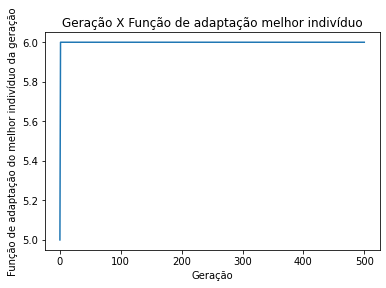

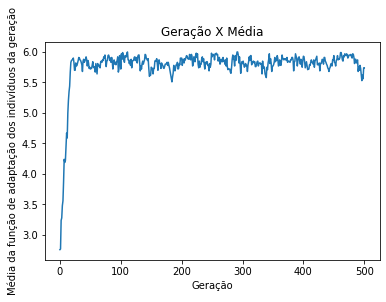

SUCESSOS 1


In [29]:
def genetico(tam_populacao, max_geracoes, probCrossover, probMutacao, elitismo):
  n = 4
  populacao = geraPopulacao(tam_populacao, n)
  geracao = 0
  #print(populacao)

  x_geracao = [geracao]
  y_media = []
  y_melhorF = []
  
  if elitismo == False:

    melhor, melhor_f = achaMelhorIndividuo(populacao)
    y_melhorF.append(melhor_f)

    while geracao <= max_geracoes:
      #print("POPULACAO" + str(populacao))
      # FAZ A SELEÇÃO
      pop_inter1 = selecao(populacao)
      #print("Pop inter1" + str(pop_inter1))

      #FAZ O CROSSOVER na populacao intermedária e retorna uma nova pop intermediária
      pop_inter2 = [] #vai armazenar o que veio do crossover
      while len(pop_inter1) > 0:
        aux1 = random.randint(0, len(pop_inter1)-1) #sorteio as mães
        mae1 = pop_inter1[aux1] 
        pop_inter1.pop(aux1) #já retiro para não ter chance de sortear o mesmo duas vezes

        aux2 = random.randint(0, len(pop_inter1)-1)
        mae2 = pop_inter1[aux2] 
        pop_inter1.pop(aux2)
        
        probCalculada = random.uniform(0, 1)
        if probCalculada <= probCrossover: #se for menor ou igual sofre o crossover
          filha1, filha2 = crossover(mae1, mae2)
          pop_inter2.append(filha1)
          pop_inter2.append(filha2)
        else:
          pop_inter2.append(mae1) #se não sofreu corssover copia
          pop_inter2.append(mae2)
      
      #print("Pop inter2" + str(pop_inter2))
      #FAZ MUTAÇÃO NA pop intermediária e retorna a nova geração
      nova_geracao = []
      for i in range(len(pop_inter2)): #ver quem vai sofrer mutacao
        probCalculada = random.uniform(0, 1)
        if probCalculada <= probMutacao:
          novo_individuo = mutacao(pop_inter2[i])
          #novo_individuo = mutacao_b(pop_inter2[i])
          nova_geracao.append(novo_individuo)
        else:
          nova_geracao.append(pop_inter2[i])
      
      #CALCULAR A MEDIA
      t, soma_total = roletaViciada(populacao)
      media_pop = soma_total/tam_populacao
      y_media.append(media_pop)
      t, soma_total_nova = roletaViciada(nova_geracao)
      media_nova = soma_total_nova/tam_populacao

      '''
      delta = media_nova - media_pop
      #print(delta)
      if delta < 0: #se delta for negativo, significa que a média da pop atual é melhor
        print("delta < 0")
        break
      
      elif delta <= 0.11: #se a diferença entre as médias for menor que ou igual a 5
        print("delta <= 0.01")
        #print("NOVA GERACAO" + str(nova_geracao))
        populacao = nova_geracao #chegamos a uma geracao interessante
        geracao = geracao + 1
        x_geracao.append(geracao)
        melhor, melhor_f = achaMelhorIndividuo(populacao)
        y_melhorF.append(melhor_f)
        y_media.append(media_nova)
        break
  
      else:
        print("Proxima geracao")
        #print("NOVA GERACAO" + str(nova_geracao))
        populacao = nova_geracao
        geracao = geracao + 1
        x_geracao.append(geracao)
        melhor, melhor_f = achaMelhorIndividuo(populacao)
        y_melhorF.append(melhor_f)
      '''
      populacao = nova_geracao
      geracao = geracao + 1
      x_geracao.append(geracao)
      melhor, melhor_f = achaMelhorIndividuo(populacao)
      y_melhorF.append(melhor_f)
    
    y_media.append(media_nova)

  else:
    
    while geracao < max_geracoes:
      #print("POPULACAO INICIO " + str(populacao))
      nova_geracao = []
      melhor, melhor_f = achaMelhorIndividuo(populacao)
      #print("MELHOR " + str(melhor) + "FITNESS " + str(melhor_f))
      nova_geracao.append(melhor) #ocupamos um espaço na nova geração, sendo que nova geração tem no máximo tam_populacao
      #print("NOVA GERACAO INICIO " + str(nova_geracao))
      y_melhorF.append(melhor_f)

      # FAZ A SELEÇÃO
      pop_inter1 = []
      pop_inter1 = selecao(populacao)
      #print("POP INTER1: " + str(pop_inter1))
      #print("Pop inter1" + str(pop_inter1))

      #FAZ O CROSSOVER na populacao intermedária e retorna uma nova pop intermediária
      pop_inter2 = [] #vai armazenar o que veio do crossover
      while len(pop_inter1) > 0:
        aux1 = random.randint(0, len(pop_inter1)-1) #sorteio as mães
        mae1 = pop_inter1[aux1].copy() 
        pop_inter1.pop(aux1) #já retiro para não ter chance de sortear o mesmo duas vezes

        aux2 = random.randint(0, len(pop_inter1)-1)
        mae2 = pop_inter1[aux2].copy()
        pop_inter1.pop(aux2)
        
        probCalculada = random.uniform(0, 1)
        if probCalculada <= probCrossover: #se for menor ou igual sofre o crossover
          filha1, filha2 = crossover(mae1, mae2)
          pop_inter2.append(filha1)
          pop_inter2.append(filha2)
        else:
          pop_inter2.append(mae1) #se não sofreu corssover copia
          pop_inter2.append(mae2)
      
      #print("Pop inter2" + str(pop_inter2))
      #FAZ MUTAÇÃO NA pop intermediária e retorna a nova geração
      pop_inter3 = []
      for i in range(len(pop_inter2)): #ver quem vai sofrer mutacao
        probCalculada = random.uniform(0, 1)
        novo_individuo = []
        if probCalculada <= probMutacao:
          novo_individuo = mutacao(pop_inter2[i])
          #novo_individuo = mutacao_b(pop_inter2[i])
          pop_inter3.append(novo_individuo)
        else:
          pop_inter3.append(pop_inter2[i])

      #pop_inter3 tem todo mundo mutado ou não
      #print("POP INTER 3 " + str(pop_inter3))
      for i in range(tam_populacao):
        if i == tam_populacao - 2: #caso seja o último espaço vago em geração
          #print("ULTIMO")
          penultimo = funcaoFitness(pop_inter3[-2])
          ultimo = funcaoFitness(pop_inter3[-1])
          if penultimo > ultimo:
            nova_geracao.append(pop_inter3[-2])
          else:
            nova_geracao.append(pop_inter3[-1])
          break
        else: #caso não seja o último
          #print('NÃO TO NO ULTIMO')
          nova_geracao.append(pop_inter3[i])

        #print("NOVA GERACAO " + str(nova_geracao))
      
      #CALCULAR A MEDIA
      t, soma_total = roletaViciada(populacao)
      media_pop = soma_total/tam_populacao
      y_media.append(media_pop)
      t, soma_total_nova = roletaViciada(nova_geracao)
      media_nova = soma_total_nova/tam_populacao

      populacao = nova_geracao.copy()
      #print("POP NOVA " + str(populacao))
      geracao = geracao + 1
      x_geracao.append(geracao)
      #print("---------------------------------------------------------------------------------------------")
    
    y_melhorF.append(melhor_f)
    y_media.append(media_nova)
      

  ## PLOTANDO O GRÁFICO 1
  plt.plot(x_geracao, y_melhorF) 
  plt.xlabel('Geração')  
  plt.ylabel('Função de adaptação do melhor indivíduo da geração') 
  plt.title('Geração X Função de adaptação melhor indivíduo') 
  plt.show()

  ## PLOTANDO O GRÁFICO 2
  plt.plot(x_geracao, y_media) 
  plt.xlabel('Geração')  
  plt.ylabel('Média da função de adaptação dos indivíduos da geração') 
  plt.title('Geração X Média') 
  plt.show()

  #print(x_geracao)
  #print(y_melhorF)
  #print("GERACAO " + str(geracao))
  return melhor, melhor_f

sucesso = 0
for tentativa in range(1):
  melhor, melhor_f = genetico(100, 500, 0.85, 0.02, True)
  if melhor_f == 6.0:
    sucesso = sucesso+1

print("SUCESSOS " + str(sucesso))

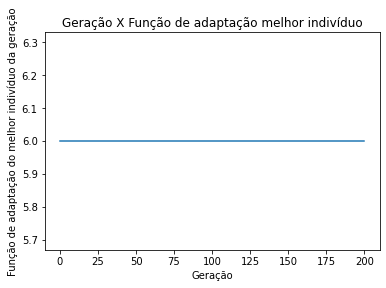

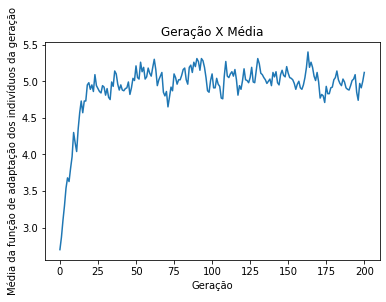

SUCESSOS 1


In [33]:
def genetico_Binario(tam_populacao, max_geracoes, probCrossover, probMutacao, elitismo):
  n = 4
  populacao = geraPopulacao_Binario(tam_populacao, n)
  geracao = 0
  #print(populacao)

  x_geracao = [geracao]
  y_media = []
  y_melhorF = []

  if elitismo == False:
    melhor, melhor_f = achaMelhorIndividuo_Binario(populacao, n)
    y_melhorF.append(melhor_f)

    while geracao <= max_geracoes:
      pop_inter1 = selecao_Binario(populacao, n)
      pop_inter2 = []

      while len(pop_inter1) > 0:
        aux1 = random.randint(0, len(pop_inter1)-1)
        mae1 = pop_inter1[aux1]
        pop_inter1.pop(aux1)

        aux2 = random.randint(0, len(pop_inter1)-1)
        mae2 = pop_inter1[aux2]
        pop_inter1.pop(aux2)

        probCalculada = random.uniform(0,1)
        if probCalculada <= probCrossover:  # se for menor ou igual sofre o crossover
          filha1, filha2 = crossover(mae1, mae2)
          pop_inter2.append(filha1)
          pop_inter2.append(filha2)

        else:
          pop_inter2.append(mae1)  # se não sofreu corssover copia
          pop_inter2.append(mae2) 
        
      #FAZ A MUTAÇÃO
      nova_geracao = []
      for i in range(len(pop_inter2)):
        probCalculada = random.uniform(0, 1)
        if probCalculada <= probMutacao:
          novo_individuo = mutacao_Binario(pop_inter2[i])
          nova_geracao.append(novo_individuo)
        else:
          nova_geracao.append(pop_inter2[i])
        
      #CALCULA A MEDIA
      populacao_decimal = transformaBinparaDecimal(populacao, n)
      nova_geracao_decimal = transformaBinparaDecimal(nova_geracao, n)
      t, soma_total = roletaViciada(populacao_decimal)
      media_pop = soma_total / tam_populacao
      y_media.append(media_pop)
      t, soma_total_nova = roletaViciada(nova_geracao_decimal)
      media_nova = soma_total_nova / tam_populacao

      populacao = nova_geracao
      geracao = geracao + 1
      x_geracao.append(geracao)
      melhor, melhor_f = achaMelhorIndividuo_Binario(populacao, n)
      y_melhorF.append(melhor_f)
      
    y_media.append(media_nova)
    
  #COM ELITISMO
  else:
    while geracao < max_geracoes:
      nova_geracao = []
      melhor, melhor_f = achaMelhorIndividuo_Binario(populacao, n)
      nova_geracao.append(melhor)
      y_melhorF.append(melhor_f)

      pop_inter1 = selecao_Binario(populacao, n)
      pop_inter2 = []

      #FAZ O CROSSOVER
      while len(pop_inter1) > 0:
        aux1 = random.randint(0, len(pop_inter1)-1)
        mae1 = pop_inter1[aux1]
        pop_inter1.pop(aux1)

        aux2 = random.randint(0, len(pop_inter1)-1)
        mae2 = pop_inter1[aux2]
        pop_inter1.pop(aux2)

        probCalculada = random.uniform(0, 1)
        if probCalculada <= probCrossover:
          filha1, filha2 = crossover_Binario(mae1, mae2)
          pop_inter2.append(filha1)
          pop_inter2.append(filha2)
        else:
          pop_inter2.append(mae1)
          pop_inter2.append(mae2)
      
      #FAZ A MUTAÇÃO
      pop_inter3 = []
      for i in range(len(pop_inter2)):
        probCalculada = random.uniform(0, 1)
        if probCalculada <= probMutacao:
          novo_individuo = mutacao_Binario(pop_inter2[i])
          pop_inter3.append(novo_individuo)
        else:
          pop_inter3.append(pop_inter2[i])
      
      #adiciona na nova geração, testando para ver se tem espaço
      pop_interDecimal = transformaBinparaDecimal(pop_inter3, n)
      for i in range(tam_populacao):
        if i == tam_populacao - 2:  # caso seja o último espaço vago em geração
          #print("ULTIMO")
          penultimo = funcaoFitness(pop_interDecimal[-2])
          ultimo = funcaoFitness(pop_interDecimal[-1])
          if penultimo > ultimo:
            nova_geracao.append(pop_inter3[-2])
          else:
            nova_geracao.append(pop_inter3[-1])
          break
        else:  # caso não seja o último
          #print('NÃO TO NO ULTIMO')
          nova_geracao.append(pop_inter3[i])
      

      populacao_decimal = transformaBinparaDecimal(populacao, n)
      nova_geracao_decimal = transformaBinparaDecimal(nova_geracao, n)
      t, soma_total = roletaViciada(populacao_decimal)
      media_pop = soma_total / tam_populacao
      y_media.append(media_pop)
      t, soma_total_nova = roletaViciada(nova_geracao_decimal)
      media_nova = soma_total_nova / tam_populacao

      populacao = nova_geracao.copy()
      geracao = geracao + 1
      x_geracao.append(geracao)
    
    y_melhorF.append(melhor_f)
    y_media.append(media_nova)

      
  ## PLOTANDO O GRÁFICO 1
  plt.plot(x_geracao, y_melhorF)
  plt.xlabel('Geração')
  plt.ylabel('Função de adaptação do melhor indivíduo da geração')
  plt.title('Geração X Função de adaptação melhor indivíduo')
  plt.show()

  ## PLOTANDO O GRÁFICO 2
  plt.plot(x_geracao, y_media)
  plt.xlabel('Geração')
  plt.ylabel('Média da função de adaptação dos indivíduos da geração')
  plt.title('Geração X Média')
  plt.show()
  

  return melhor, melhor_f

sucesso = 0
for tentativa in range(1):
  melhor, melhor_f = genetico_Binario(100, 200, 0.95, 0.2, True)
  if melhor_f == 6.0:
    sucesso = sucesso+1

print("SUCESSOS " + str(sucesso))

<h2>5 - Utilizando diferentes valores para os parâmetros de entrada, diferentes representações de indivíduos e diferentes tamanhos de tabuleiro (4,8,16,32), compare e discuta os resultados obtidos.

Link para o [Google Sheets](https://docs.google.com/spreadsheets/d/1axdvzWmageNpcpAxOB7_Wjjz30wYLRf1CfoS5vACOIY/edit?usp=sharing)


**ressaltar que as mutações no binário e no decimal são diferentes**<br>
**chega um ponto que subir o valor da mutação volta a fazer o número de sucessos cair**

A partir do tabuleiro 8x8 ficou cada vez dificil encontrar um caso que encontre a solução, além de que aumentando os parâmetros deora ainda mais para chegar a um resultado. Com isso, ficou inviável realizar os testes para 16x16 e 32x32.